# 인공 신경망

### 패션 MNIST 데이터 가져오기

In [1]:
from tensorflow import keras

In [2]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [3]:
# 훈련 데이터 shape
print(train_input.shape, train_target.shape)
# 테스트 데이터 shape
print(test_input.shape, test_target.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


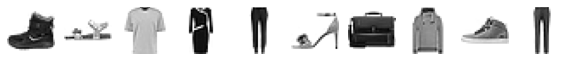

In [4]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[-i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [5]:
print([train_target[i] for i in range(10)]) # 의류 카테고리별 다른 숫자

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


- 패션 아이템 종류

0
티셔츠


1
바지


2
스웨터


3
드레스


4
코트


5
샌들


6
셔츠


7
스니커즈


8
가방 


9
앵클부츠

In [6]:
import numpy as np

print(np.unique(train_target, return_counts=True)) # label별 개수 확인, 모두 6000개로 동일

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
      dtype=int64))


### 로지스틱 회귀로 패션아이템 분류

In [7]:
train_scaled = train_input / 255.0 # 각 픽셀이 0~255의 정수값을 가지기 때문에 255로 나눠서 0~1 사이의 실수로 정규화
train_scaled = train_scaled.reshape(-1,28*28) 
# 2차원 배열을 1차원 배열로 변환, 이때 첫번째 차원인 샘플 개수는 변하지 않고 원본 데이터의 높이와 너비를 곱해서 하나의 차원으로 만들어서 각 샘플이 하나의 배열이 되도록 변환

In [8]:
print(train_scaled.shape) # 변환된 결과(샘플 개수, 픽셀)

(60000, 784)


In [9]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss = 'log', max_iter=5, random_state= 42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs = -1)
print(np.mean(scores['test_score'])) # 정확도 출력

0.8192833333333333


In [11]:
scores['test_score']

array([0.82908333, 0.81941667, 0.82075   , 0.80916667, 0.818     ])

- loss : 손실 함수의 종류 지정 -> 'log'로 지정하여 로지스틱 손실 함수로 지정
- max_iter : 수행할 에폭 횟수를 지정 -> 전체 훈련 세트를 5회 반복(반복 횟수를 늘려도 성능이 크게 향상되지 않음, 횟수를 늘릴수록 overfitting)
- SGDClassifier : SGD(Stochastic Gradient Descent)를 이용한 정규화된 선형 분류 모델, 계산값을 기반으로 계산값이 0보다 작으면 -1, 0보다 크면 1로 분류

In [11]:
sc = SGDClassifier(loss = 'log', max_iter=30, random_state= 42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs = -1)
print(np.mean(scores['test_score'])) # 정확도 출력

0.8427833333333334


- 에폭 횟수 증가로 약간의 정확도 향상 확인